# 4.9: Exercise Intro to Data Visualization with Python

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r"C:\Users\wallm\11 2024 Instacart Basket Analysis 1"

In [6]:
path

'C:\\Users\\wallm\\11 2024 Instacart Basket Analysis 1'

In [8]:
ords_prods_comb_merg_agg = pd.read_pickle(os.path.join(path,'02 Data','Prepared data', 'orders_products_combined_merged_aggregated.pkl'))

<Axes: xlabel='orders_day_of_week'>

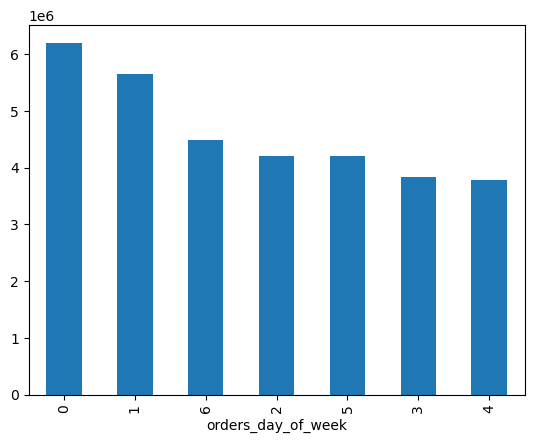

In [16]:
ords_prods_comb_merg_agg['orders_day_of_week'].value_counts().plot.bar() #the observations are ordered from largest to smallest

<Axes: xlabel='orders_day_of_week'>

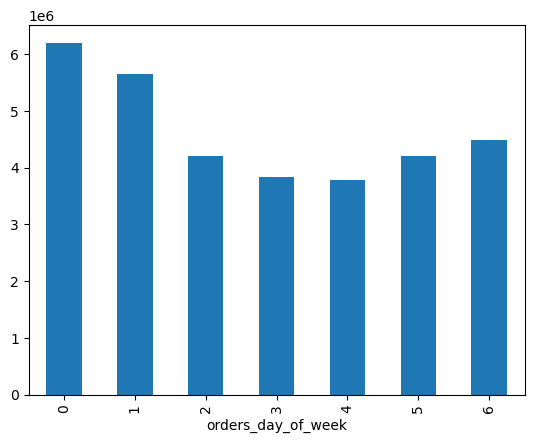

In [14]:
# Sort the barchart according to their index order
ords_prods_comb_merg_agg['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [18]:
# You can reorder your columns to appear in their indexed order when printing frequencies, too.
ords_prods_comb_merg_agg['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [22]:
ords_prods_comb_merg_agg['orders_day_of_week'].value_counts().sort_index() # now sorted by index title

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

##### To make your bars more distinct, you can also change their color. Doing so is as easy as adding a color argument in your plot.bar() function and listing the colors you want in order:

<Axes: xlabel='orders_day_of_week'>

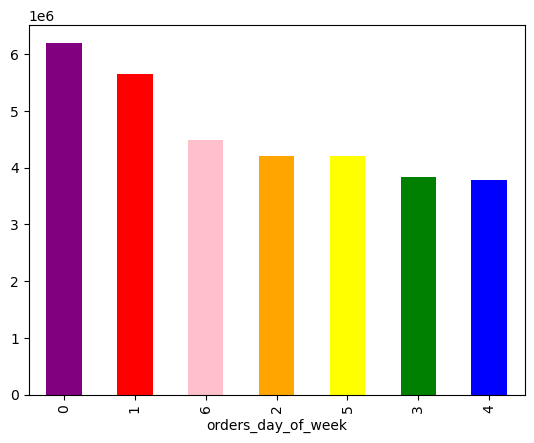

In [25]:
ords_prods_comb_merg_agg['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

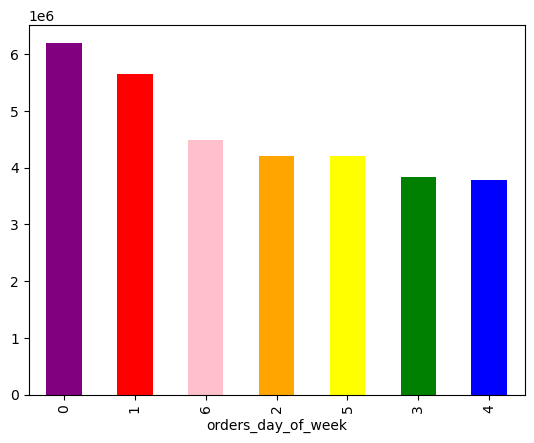

In [27]:
# Save bar chart by recalling 'bar.figure'
bar = ords_prods_comb_merg_agg['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

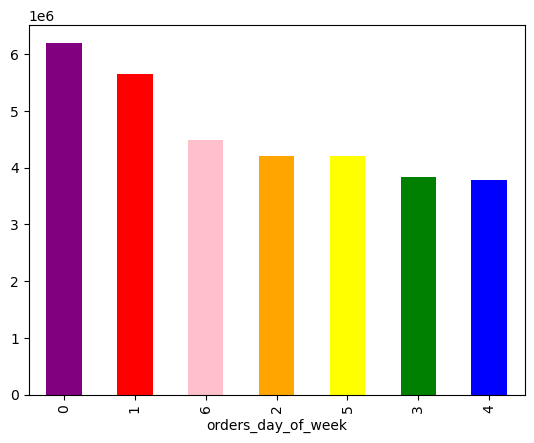

In [29]:
bar.figure

In [39]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png')) # file now saved in visualizations folder

<Axes: ylabel='Frequency'>

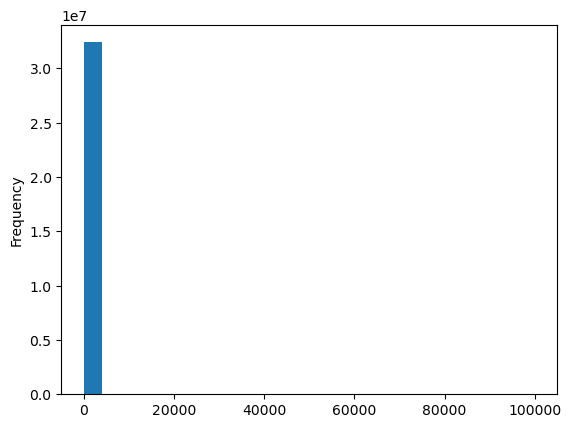

In [37]:
# a histogram of the “prices” column. You can do so via the following code
ords_prods_comb_merg_agg['prices'].plot.hist(bins = 25)

In [43]:
# Investigate why histogram is not looking correct
ords_prods_comb_merg_agg['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

##### While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result. How could an item cost $99,999.00? This must be the result of data corruption or some kind of special value within the data.

##### This is what is breaking the histogram

<Axes: xlabel='prices', ylabel='prices'>

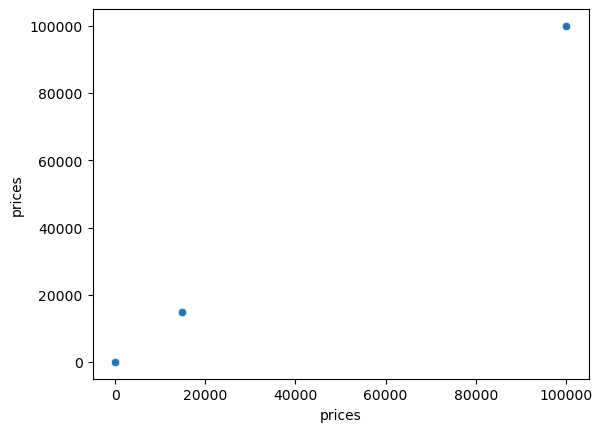

In [48]:
# Use a scatterplot to try plotting the “prices” column against itself. This will reveal whether there are any outliers.
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_comb_merg_agg)

##### Let’s first determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item. If you imagined the maximum price anyone would pay in a supermarket were around $100, then anything above that amount could be considered an outlier

In [55]:
ords_prods_comb_merg_agg.loc[ords_prods_comb_merg_agg['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge,...,prices,Match,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_median_gap,customer_frequency
1576,912404,17,12,2,14,5.0,21553,5,0,both,...,14900.0,both,Regularly busy,Most orders,40,Regular customer,108.648299,High_spender,5.0,Frequent customer
1638,603376,17,22,6,16,4.0,21553,3,1,both,...,14900.0,both,Regularly busy,Average orders,40,Regular customer,108.648299,High_spender,5.0,Frequent customer
16522,3264360,135,2,2,21,13.0,21553,6,0,both,...,14900.0,both,Regularly busy,Average orders,4,New customer,1154.792308,High_spender,12.0,Regular customer
16528,892534,135,3,0,8,12.0,21553,3,1,both,...,14900.0,both,Busiest days,Average orders,4,New customer,1154.792308,High_spender,12.0,Regular customer
53672,229704,342,8,1,19,30.0,21553,9,0,both,...,14900.0,both,Busiest days,Average orders,16,Regular customer,114.426619,High_spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,both,...,14900.0,both,Busiest days,Average orders,25,Regular customer,351.141618,High_spender,6.0,Frequent customer
32347717,2504315,205818,3,5,15,3.0,21553,13,0,both,...,14900.0,both,Regularly busy,Most orders,25,Regular customer,170.073770,High_spender,13.0,Regular customer
32347727,1108388,205818,5,4,5,1.0,21553,5,1,both,...,14900.0,both,Least busy days,Fewest orders,25,Regular customer,170.073770,High_spender,13.0,Regular customer
32380527,1916142,206049,1,2,17,NaN,21553,2,0,both,...,14900.0,both,Regularly busy,Average orders,5,New customer,938.031250,High_spender,7.0,Frequent customer


In [59]:
# let’s mark them as missing since they don’t make sense in terms of the other values in the column. To turn them into NaNs, use the following code:
ords_prods_comb_merg_agg.loc[ords_prods_comb_merg_agg['prices'] >100, 'prices'] = np.nan # np.nan.function from the np; used to assign missing values

In [65]:
ords_prods_comb_merg_agg['prices'].max()

25.0

##### Now max price is 25.0

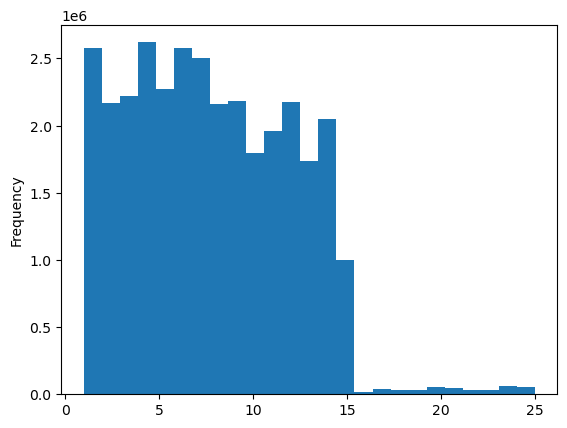

In [69]:
hist = ords_prods_comb_merg_agg['prices'].plot.hist(bins = 25)

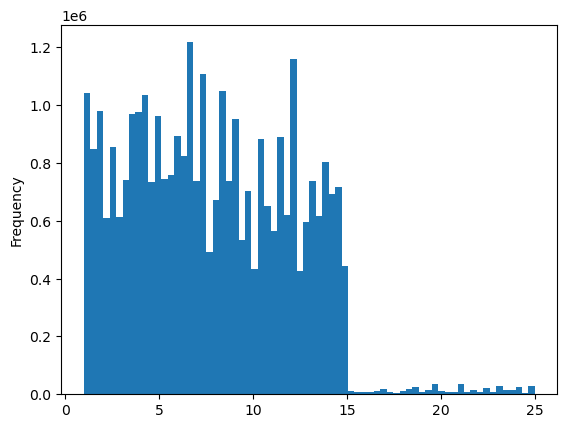

In [71]:
hist = ords_prods_comb_merg_agg['prices'].plot.hist(bins = 70)

##### Increasing the number of bins will allow you to see more variety in your histogram.

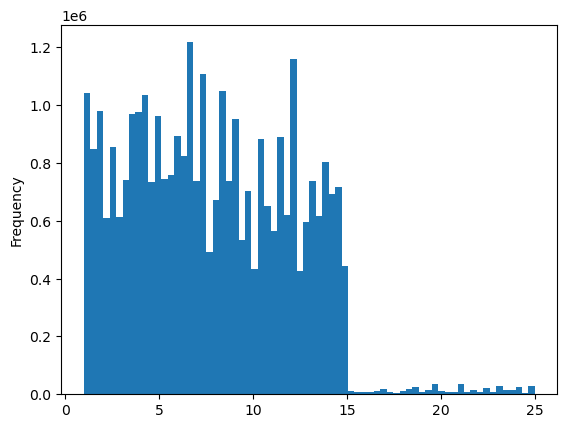

In [85]:
# Save histogram by recalling 'hist.figure'
hist = ords_prods_comb_merg_agg['prices'].plot.hist(bins = 70)

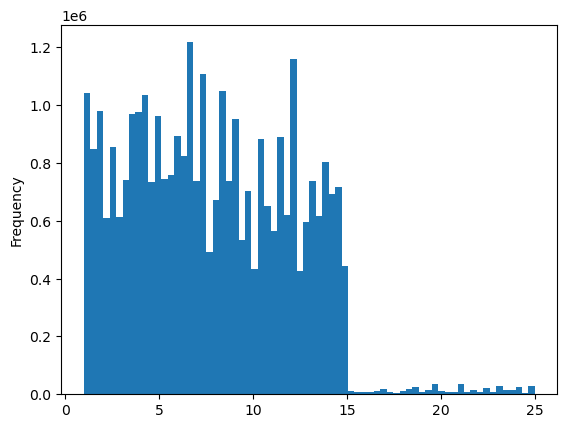

In [87]:
hist.figure

In [89]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_histogram.png')) # file now saved in visualizations folder

### Data sampling
#### In the first line of the command, you set the “seed.” This “seed” represents a random but reproducible pattern—Python will always give you the same set of random numbers (in this case, seed “4”) rather than creating a new pattern of numbers every time you run the command. You don’t want that as your example needs to be reproducible by you and other analysts.

In [94]:
# Creating these samples requires a list of random floating numbers between 0 and 1
np.random.seed(4)
dev = np.random.rand(len(ords_prods_comb_merg_agg)) <= 0.7

##### dev. This will be what stores your boolean values—you’ll be getting an output of True or False for every value based on whether it’s less than or equal to 0.7:

##### The value you put inside the seed doesn’t actually matter in the grand scheme of things. Whether you use 1, 52, 179, or 4, all you’re doing is ensuring that the random distribution you’re creating is reproducible.

In [98]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [100]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [102]:
# can you use your list to split your dataframe into two samples?
big = ords_prods_comb_merg_agg[dev]
small = ords_prods_comb_merg_agg[~dev]

In [104]:
# Create a list holding True/False values based on the test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_comb_merg_agg)) <= 0.7

In [106]:
# Store 70% of the sample in the dataframe big
big = ords_prods_comb_merg_agg[dev]

In [108]:
# Store 30% of the sample in the dataframe small
small = ords_prods_comb_merg_agg[~dev]

In [110]:
len(ords_prods_comb_merg_agg)

32404859

In [112]:
len(big) + len(small)

32404859

#### Results match the total number of rows!

In [115]:
#  let’s do something that will speed up the processing time even further
df_2 = small[['orders_day_of_week','prices']]

##### This creates a new dataframe, df_2, that contains only the “prices” and “orders_day_of_week” columns from your small subset.

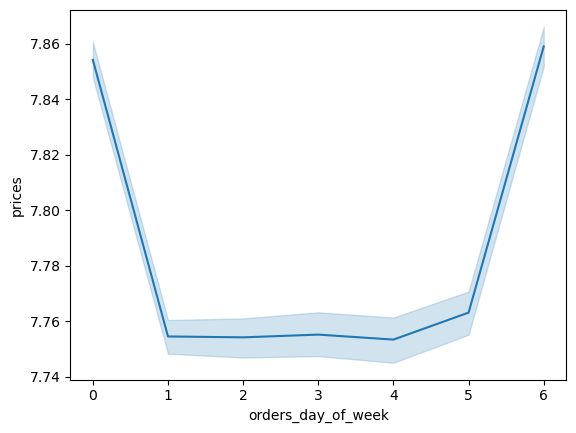

In [118]:
# Create the line chart of order_day_of_week v prices
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

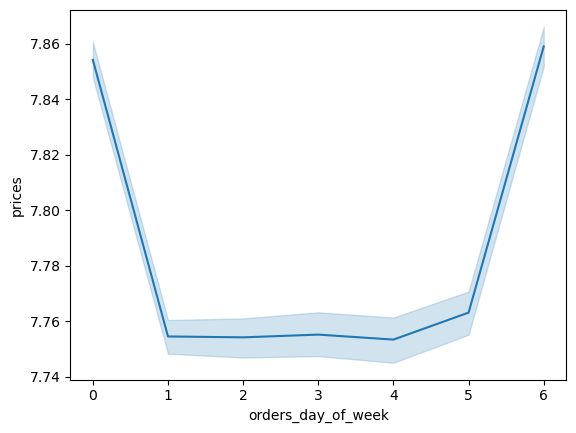

In [120]:
line.figure

In [122]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_vs_dow.png')) # file now saved in visualizations folder